# 2023_01_16_Problema 1

En la siguiente tabla se presenta una muestra de entrenamiento no linealmente separable en $\mathbb{R}^2$ y los correspondientes multiplicadores de Lagrange óptimos obtenidos al entrenar una máquina de vectores soporte con esta muestra (y C=10):
$$\begin{array}{|l||rrrrrrrr|}
\hline
 i     &  1 &  2 &  3 &  4 &  5 &  6 &  7 &  8 \\
\hline
 x_{i1} &  1 &  2 &  2 &  4 &  3 &  2 &  4 &  4 \\
 x_{i2} &  4 &  2 &  3 &  2 &  4 &  5 &  4 &  3 \\
\hline
\text{Clase} & +1 & +1 & -1 & +1 & -1 & -1 & -1 & -1 \\
\hline
\hline
 \alpha^\star_i & 
% 666.7& 0 & 10000 & 666.9& 0 & 0 & 0 & 333.6 \\
  7.11  & ~0 & ~10    & \!\!9.11 & ~~0 & ~~0 & ~~0 & \!6.22\\
\hline
\end{array}$$

Se pide:
* Obtener la función discriminante lineal correspondiente.
* Representar gráficamente la frontera lineal de separación entre clases y las muestras de entrenamiento, indicando cuáles son vectores soporte.
* Clasificar la muestra $(5,5)^t$.

## Solución

**Pesos de la función discriminante:**

$\boldsymbol{\theta}^\star = c_1~\alpha^\star_1~\boldsymbol{x_1} 
              + c_3~\alpha^\star_3~\boldsymbol{x_3} 
              + c_4\alpha^\star_4~\boldsymbol{x_4} 
              + c_8\alpha^\star_8~\boldsymbol{x_8} $

$\theta^*_1~=~(+1)~(1)~(7.11)+(-1)~(2)~(10)+(+1)~(4)~(9.11)+(-1)~(4)~(6.22)~=~-1.33$

$\theta^*_2~=~(+1)~(4)~(7.11)+(-1)~(3)~(10)+(+1)~(2)~(9.11)+(-1)~(3)~(6.22)~=~-2.00$

Usando el vector soporte $\boldsymbol{x_1}$ (que verifica la condición : $0 < \alpha_1^* < C$)

$\theta^\star_0 = c_1-{\boldsymbol{\theta}^\star}^t\boldsymbol{x_1} = 1 - ((-1.33)~(1) - (2.00)~(4)) = 10.33$
 
**Frontera de separación y representación gráfica:**

Ecuación de la frontera lineal de separación: $~ 10.33 - 1.33~x_1 -  2.00~x_2 ~=~ 0 ~~\rightarrow~~$  $  x_2 = - 0.665~x_1 + 5.165\,$.

Los vectores de entrenamiento son todos los de la tabla.  De ellos, los vectores soporte son: $(1,4)^t, (2,3)^t, (4,2)^t, (4,3)^t\,$.

Representación gráfica:
<div><img src="2023_01_16_Problema 1.png" width=400></div>

**Clasificación de la muestra $(5,5)^t$:**

El valor de la función discriminante para este vector es: $~\theta^*_0+\theta^*_1~5+\theta^*_2~5~=-6.32 <0 ~\Rightarrow\,$ clase -1.


## Solución con sklearn

In [1]:
import numpy as np; np.set_printoptions(precision=4, suppress=True); from sklearn import svm
X = np.array([[1, 4], [2, 2], [2, 3], [4, 2], [3, 4], [2, 5], [4, 4], [4, 3]]).astype(np.float32)
y = np.array([1, 1, -1, 1, -1, -1, -1, -1]).astype(np.int32); N, D = X.shape
C = 10.0; clf = svm.SVC(C=C, kernel='linear').fit(X, y)
a = np.zeros(N); a[clf.support_] = clf.dual_coef_ * y[clf.support_]; print('alfa: ', a)
w = clf.coef_[0]; w0 = clf.intercept_ [0]; m = 2.0/np.linalg.norm(w);
t = np.zeros(N); t[clf.support_] = 1.0 - y[clf.support_] * (clf.support_vectors_ @ w + w0)
print('w:', w, ' w0:', round(w0, 4), ' margen:', round(m, 4), '\nt:', t)
Z = [[5, 5]]; print('Clase de', Z[0],':',clf.predict(Z)[0])

alfa:  [ 7.1111  0.     10.      9.1109  0.      0.      0.      6.222 ]
w: [-1.3333 -1.9998]  w0: 10.3325  margen: 0.8321 
t: [-0.0001  0.      2.6666  0.0001  0.      0.      0.      0.0001]
Clase de [5, 5] : -1


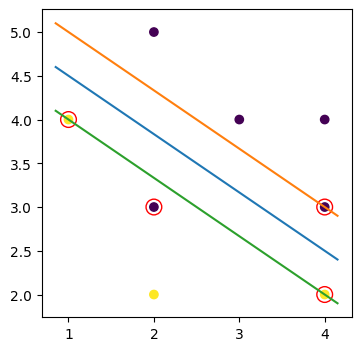

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(4, 4)); ax.scatter(*X.T, c=y)
x1 = np.linspace(*ax.get_xlim()); x2 = (-w[0]*x1 - w0)/w[1]
ax.plot(x1, x2, x1, x2 - 1/w[1], x1, x2 + 1/w[1])
ax.scatter(*clf.support_vectors_.T, s=128, facecolors='none', edgecolors='r');